# Algerian Forest Fire Prediction

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv(r'Algerian_Data.csv')
df.head()

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [27]:
df = df.drop(['day','month','year'],axis=1)
df.head()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [28]:
df['classes'] = df['classes'].str.strip()

In [29]:
df['classes'].value_counts()

classes
fire        137
not fire    106
Name: count, dtype: int64

In [30]:
df['classes'] = df['classes'].map({
    'fire': 1,
    'not fire':0
})

In [31]:
df['classes'].value_counts()

classes
1    137
0    106
Name: count, dtype: int64

In [32]:
df.sample(10)

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
235,35,56,14,0.0,89.0,29.4,115.6,7.5,36.0,15.2,1,1
86,31,78,18,0.0,85.8,45.6,190.6,4.7,57.1,13.7,1,0
71,35,63,13,0.0,88.9,21.7,77.0,7.1,25.5,12.1,1,0
55,36,53,19,0.0,89.2,17.1,98.6,10.0,23.9,15.3,1,0
23,32,66,17,0.0,85.9,11.2,55.8,5.6,14.9,7.5,1,0
16,30,89,16,0.6,37.3,1.1,7.8,0.0,1.6,0.0,0,0
109,32,49,11,0.0,89.4,9.8,33.1,6.8,11.3,7.7,1,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,10.9,1,1
168,33,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,1,1
202,36,71,15,0.0,86.0,36.9,117.1,5.1,41.3,12.2,1,1


In [33]:
# divide feature into independent and dependent

X = df.drop('fwi',axis=1)
y = df['fwi']

print(X)
print(y)



     temperature  rh  ws  rain  ffmc   dmc    dc  isi   bui  classes  region
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4        0       0
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9        0       0
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7        0       0
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7        0       0
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9        0       0
..           ...  ..  ..   ...   ...   ...   ...  ...   ...      ...     ...
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9        1       1
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2        0       1
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4        0       1
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1        0       1
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8        0       1

[243 rows x 11 columns]
0      0.5
1      0.4
2      0.1
3      0.0
4      

In [34]:
# train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [35]:
X_train.shape

(182, 11)

In [36]:
X_test.shape

(61, 11)

In [37]:
# feature selection based on correlation 

df.corr()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
rh,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
ffmc,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
dmc,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
dc,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
isi,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
bui,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
fwi,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

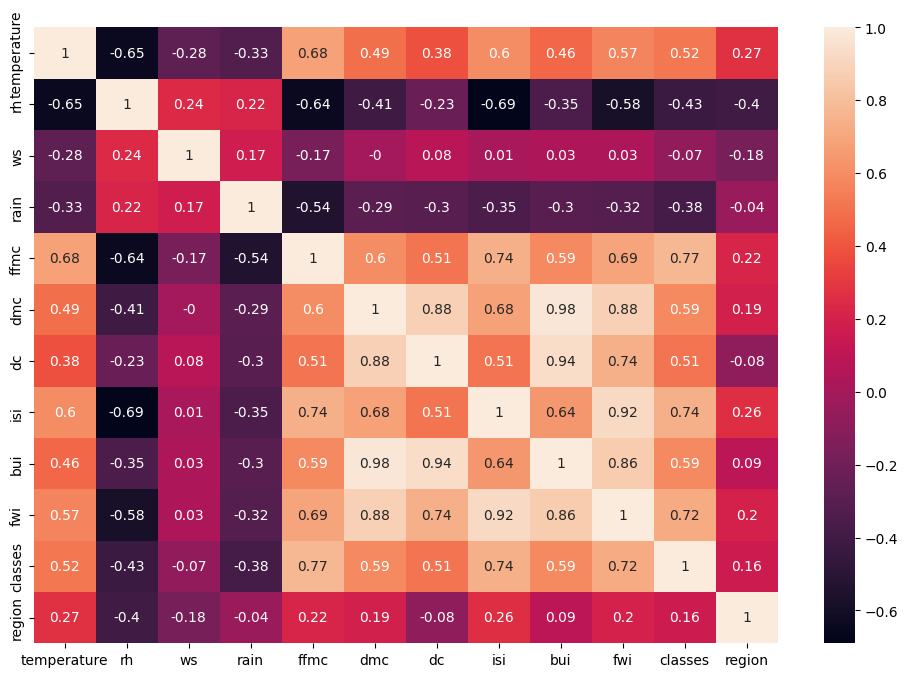

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(round(df.corr(),2),annot=True)

In [39]:
# here dmc and dc is highly co related with bui
# so we can remove dmc and dc or dc and bui

df.drop(['dmc','bui','isi'],axis=1, inplace=True)
df.head()


,temperature,rh,ws,rain,ffmc,dc,fwi,classes,region
0,29,57,18,0.0,65.7,7.6,0.5,0,0
1,29,61,13,1.3,64.4,7.6,0.4,0,0
2,26,82,22,13.1,47.1,7.1,0.1,0,0
3,25,89,13,2.5,28.6,6.9,0.0,0,0
4,27,77,16,0.0,64.8,14.2,0.5,0,0


In [40]:
df.corr()

,temperature,rh,ws,rain,ffmc,dc,fwi,classes,region
temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.376284,0.566670,0.516015,0.269555
rh,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.226941,-0.580957,-0.432161,-0.402682
ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,0.079135,0.032368,-0.069964,-0.181160
rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.298023,-0.324422,-0.379097,-0.040013
ffmc,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.507397,0.691132,0.769492,0.222241
dc,0.376284,-0.226941,0.079135,-0.298023,0.507397,1.000000,0.739521,0.511123,-0.078734
fwi,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.739521,1.000000,0.719216,0.197102
classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.511123,0.719216,1.000000,0.162347
region,0.269555,-0.402682,-0.181160,-0.040013,0.222241,-0.078734,0.197102,0.162347,1.000000


# Standerdization 

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Text(0.5, 0, 'After')

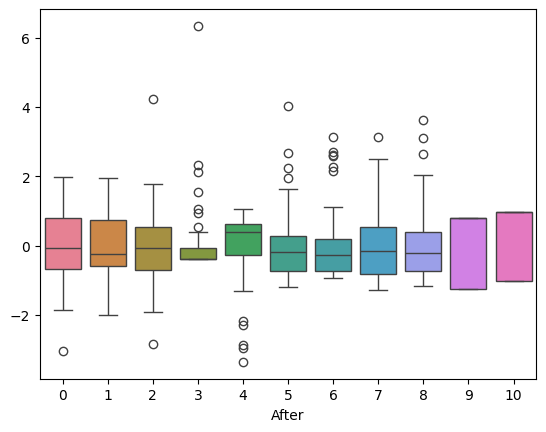

In [42]:
# after 
sns.boxplot(data=X_test_scaled)
plt.xlabel("After")

<Axes: >

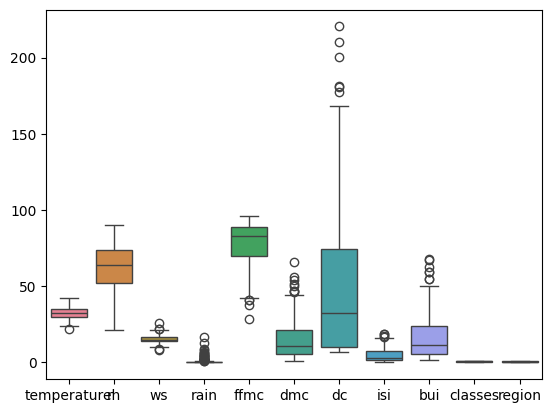

In [43]:
# before 
sns.boxplot(data= X_train)

# Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
linreg = LinearRegression()
rr = Ridge()
ls = Lasso()
lscv = LassoCV()
en = ElasticNet()

In [57]:
from sklearn.metrics import mean_absolute_error,r2_score

def test_algorithm(name,obj):
    
 
    obj.fit(X_train_scaled,y_train)
    y_pred = obj.predict(X_test_scaled)
    score = r2_score(y_test,y_pred) * 100
    mae = mean_absolute_error(y_test,y_pred) *100

    print(f"Name : {name}\nScore : {score}\nMean Absolute Error : {mae}\n")

    
test_algorithm("Linear Regression",linreg)
test_algorithm("Ridge Regression",rr)
test_algorithm("Lasso Regression",ls)
test_algorithm("Lasso Regression with CRoss Validation",lscv)
test_algorithm("Elastic Net Regression",en)



Name : Linear Regression
Score : 96.31237047751694
Mean Absolute Error : 99.03501531731742

Name : Ridge Regression
Score : 96.45024126089797
Mean Absolute Error : 98.62632654772766

Name : Lasso Regression
Score : 97.51919608268176
Mean Absolute Error : 89.67913779542913

Name : Lasso Regression with CRoss Validation
Score : 96.5460015314859
Mean Absolute Error : 94.94200732650472

Name : Elastic Net Regression
Score : 92.68080308163353
Mean Absolute Error : 146.8835901957836

